In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris=pd.read_csv("iris.csv")

In [3]:
#reading first 5 lines
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#information about the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#checking shape 
iris.shape

(150, 5)

In [6]:
#checking size
iris.size

750

In [7]:
#checking for null values
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# <font color="blue"> Data Analysis

In [9]:
#desciption of the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# <font color="blue"> Data Visualization

<Axes: xlabel='species', ylabel='count'>

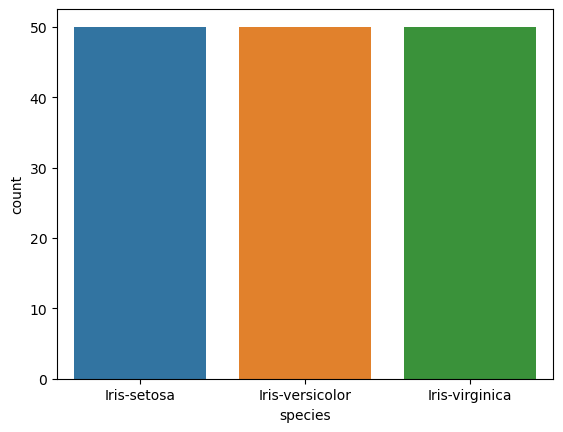

In [11]:
sns.countplot(x="species",data=iris)

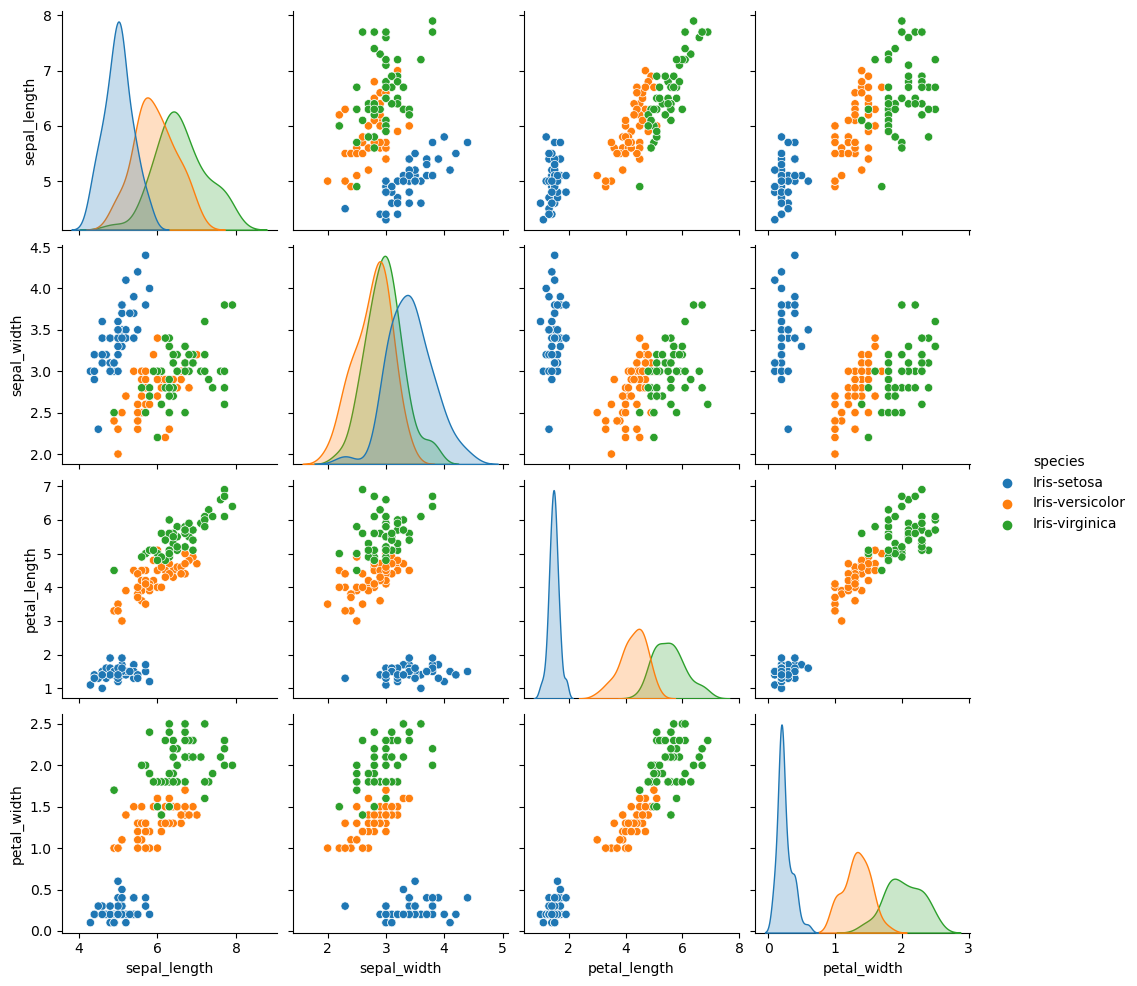

In [12]:
# Visualize the whole dataset
sns.pairplot(iris, hue='species')

# <font color="blue"> Encoding the Categorical Column

In [13]:
#changing species column to float
iris.replace({"species":{"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}},inplace=True)

In [14]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
x=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y=iris["species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

# <font color="blue"> Splitting data into training and testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [20]:
y_train.shape,y_test.shape

((120,), (30,))

# <font color="blue"> Models Training

## Logistic Regression default

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg=LogisticRegression(multi_class="multinomial")

In [23]:
log_reg.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [24]:
y_pred_log=log_reg.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [26]:
print(accuracy_score(y_test,y_pred_log))

1.0


In [27]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
print(confusion_matrix(y_test,y_pred_log))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [29]:
import scikitplot as skplt

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

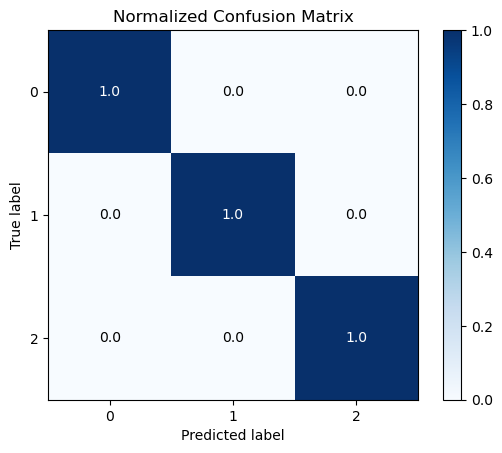

In [30]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log,normalize=True)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

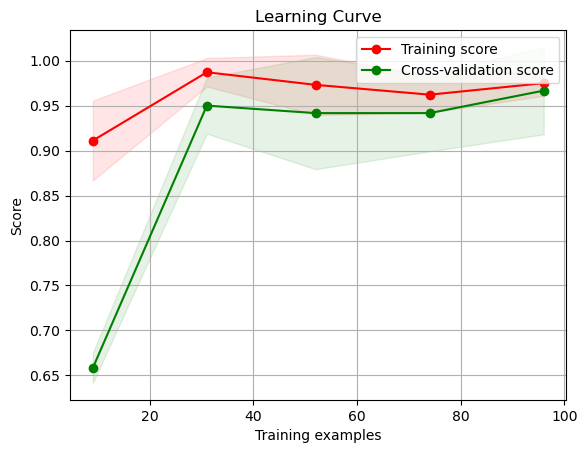

In [31]:
skplt.estimators.plot_learning_curve(log_reg,x_train,y_train)

In [32]:
model_result={}

In [33]:
model_result["Logistic Rgression Default"]=accuracy_score(y_test,y_pred_log)

In [34]:
model_result

{'Logistic Rgression Default': 1.0}

## Logistic Regression with l1 penalty

In [35]:
log_reg_l1=LogisticRegression(penalty="l1",solver="saga")

In [36]:
log_reg_l1.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [37]:
y_pred_log_l1=log_reg_l1.predict(x_test)

In [38]:
print(accuracy_score(y_test,y_pred_log_l1))

1.0


In [39]:
print(classification_report(y_test,y_pred_log_l1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
print(confusion_matrix(y_test,y_pred_log_l1))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

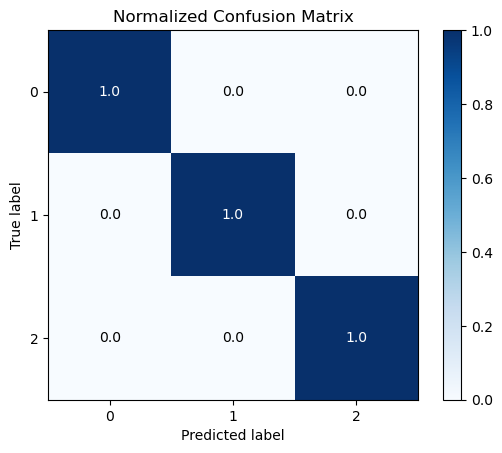

In [41]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log_l1,normalize=True)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

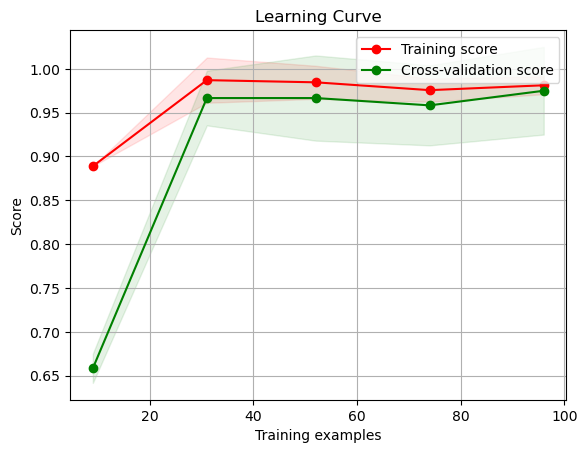

In [42]:
skplt.estimators.plot_learning_curve(log_reg_l1,x_train,y_train)

In [43]:
model_result["Logistic Regression with l1"]=accuracy_score(y_test,y_pred_log_l1)

In [44]:
model_result

{'Logistic Rgression Default': 1.0, 'Logistic Regression with l1': 1.0}

## Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
svc=SVC()

In [47]:
svc.fit(x_train,y_train)

SVC()

In [48]:
y_pred_svc=svc.predict(x_test)

In [49]:
print(accuracy_score(y_test,y_pred_svc))

1.0


In [50]:
print(confusion_matrix(y_test,y_pred_svc))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [51]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

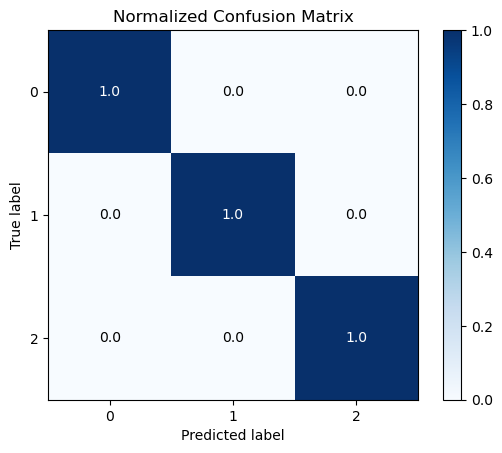

In [52]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_svc,normalize=True)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

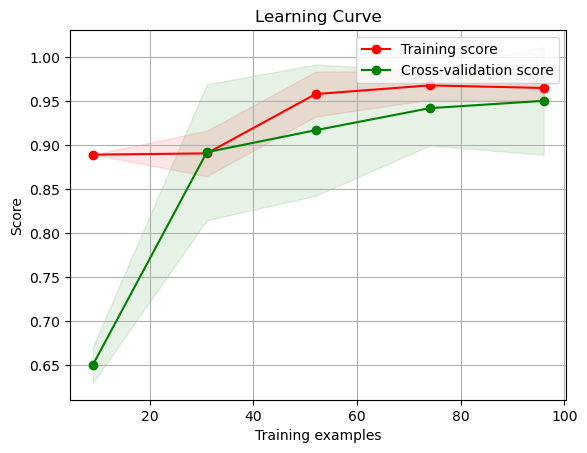

In [53]:
skplt.estimators.plot_learning_curve(svc,x_train,y_train)

In [54]:
model_result["SVM"]=accuracy_score(y_test,y_pred_svc)

In [55]:
model_result

{'Logistic Rgression Default': 1.0,
 'Logistic Regression with l1': 1.0,
 'SVM': 1.0}

In [56]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svc.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


In [57]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = log_reg.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]
